In [29]:
## Imports
import numpy as np 
import os
import pandas as pd
from matplotlib import pyplot as plt 
import skimage
from skimage import io
import io as BIO
from image_slicer import * #May need to install --> pip install image_slicer 
from PIL import Image
import zipfile
#FilePath
file_path = "/Users/takodadenhof/Downloads/Cytosim/" ## main file path to desired folder 

In [2]:
#Insert desired folder name 
folderName = input() 

no_cutters_sim/png_s


In [3]:
# Testing on one image
imageFile = file_path + folderName + '/movie0001.png'
image = io.imread(imageFile) # Change Later --> just /movie#### part

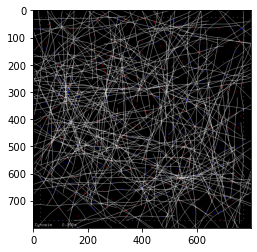

In [4]:
## Example Delete Later
plt.imshow(image)

# Image Processing

## Black Pixel Ratio


In [41]:
#ReDefined --> Parse through Sections of a image vs slicing image? Use KNN to discover "Holes" in a picture? 
def splitRatioBlack(arrayLength,path_to_folder,num,tileNumbers):
    ratio_black = np.zeros((arrayLength, arrayLength))
    #Figure out how to loop through sliced tiles
    for tile in tileNumbers:
        filePath = path_to_folder + '/movie'+ num + tile + '.png'
        ratio = ratioBlack(filePath)
        i = tileNumbers.index(tile)
        ratio_black[i//arrayLength, i%arrayLength] = ratio
    return ratio_black

def ratioBlack(filePath):
        im = Image.open(filePath)
        pixels = im.getdata()          # get the pixels as a flattened sequence
        black_thresh = 50
        nblack = 0
        for pixel in pixels:
            if sum(pixel) < black_thresh:
                nblack += 1
        n = len(pixels)
        return nblack / float(n)
##Slicing each image to 16 output images
def sliceAllImages(numImages,pathToFolder):
    for i in range(numImages):
        num = f'{i:04}'
        path = pathToFolder + '/movie'+num +'.png'
        slice(path,16)
def deleteSlicedImages(pathToFolder,numImages,tileNumbers):
    try:
        for i in range(numImages):
            num = f'{i:04}'
            for tile in tileNumbers:
                file = pathToFolder + '/movie'+ num + tile + '.png'
                os.remove(file)
    except OSError as e:
        print("Error: %s : %s" % (file_path, e.strerror))
##
# Path To Folder --> Movie Data : png_s folder 
# NewDirName --> folder for sliced images to go into : /tileSlices
# timeStep --> time between each movie####.png image
# numImages --> Number of total images in Folder 
# splitRatioBlack -- arrayLength --> sqrt of number of slices : 4
def getMovieData(pathToFolder,timeStep,numImages):
    tileNumbers = ['_01_01','_01_02','_01_03','_01_04','_02_01','_02_02','_02_03','_02_04','_03_01','_03_02','_03_03','_03_04','_04_01','_04_02','_04_03','_04_04']
    sliceAllImages(numImages,pathToFolder)
    finalData = {}
    for i in range(numImages):
        num = f'{i:04}'
        data = splitRatioBlack(4,pathToFolder,num,tileNumbers)
        time = i * timeStep
        finalData.update({time : data})
    deleteSlicedImages(pathToFolder,numImages,tileNumbers)
    return finalData

    
        
        


In [43]:
# Run This Cell
pathToFolder = file_path + folderName
data = getMovieData(pathToFolder,.05,502)

## Processing Data

In [97]:
def transform(data,arrayLength,numImages,timeStep):
    time = []
    pixelRatio = []
    section = []
    for i in range(numImages):
        keyVal = i * timeStep
        for j in range(16):
            value = data[keyVal]
            time.append(keyVal)
            pix = value[j//arrayLength][j%arrayLength]
            pixelRatio.append(pix)
            section1Temp = str(j//arrayLength + 1 )
            section2Temp = str(j%arrayLength + 1 )
            sectionVal = 'Section '+ section1Temp + ' ' + section2Temp
            section.append(sectionVal)
    df = [time,pixelRatio,section]
    time = df[0]
    pixelRatio = df[1]
    section = df[2]
    time
    dfFinal = pd.DataFrame(time,columns = ['time'])
    dfFinal['pixelRatio'] = pixelRatio
    dfFinal['section'] = section
    return dfFinal    

In [99]:
df = transform(data,4,502,.05)
df.head()

,time,pixelRatio,section
0,0.0,0.877900,Section 1 1
1,0.0,0.852125,Section 1 2
2,0.0,0.854525,Section 1 3
3,0.0,0.905125,Section 1 4
4,0.0,0.802775,Section 2 1


## Graphing Data

In [103]:
#Graphing Imports
#!pip install plotnine --> If recieving an error undo Comment to install plotline to kernel 
from plotnine import *
from plotnine.data import *
%matplotlib inline



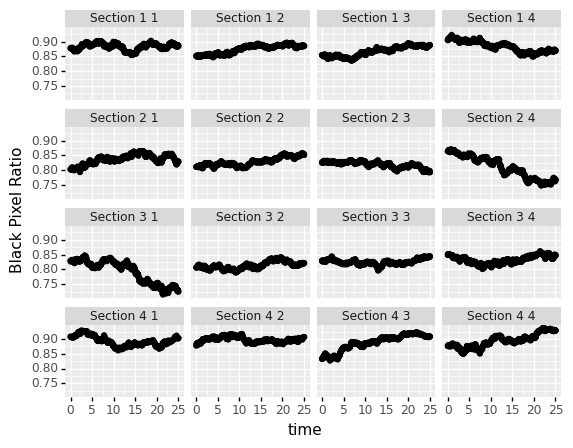

<ggplot: (8774853709228)>

In [105]:
(
    ggplot(df,aes(x = 'time', y = 'pixelRatio')) + geom_point() + facet_wrap('section') + labs(x = 'time',y = 'Black Pixel Ratio')
)